In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("data/company_data.csv")

rev_collums = [f"revenue_mil_y{y}" for y in range(2015, 2024)]
emp_collums = [f"employees_y{y}" for y in range(2015, 2024)]

years_list = [str(y) for y in range(2015, 2024)]
growth_years = [str(y) for y in range(2016, 2024)]

# Separate AI and Non-AI companies
df_ai = df[df['is_ai'].str.lower() == 'ai']
df_non_ai = df[df['is_ai'].str.lower() == 'non ai']

df.head()

,name,sector,is_ai,revenue_mil_y2015,revenue_mil_y2016,revenue_mil_y2017,revenue_mil_y2018,revenue_mil_y2019,revenue_mil_y2020,revenue_mil_y2021,...,revenue_mil_y2023,employees_y2015,employees_y2016,employees_y2017,employees_y2018,employees_y2019,employees_y2020,employees_y2021,employees_y2022,employees_y2023
0,3M,Chemicals,Ai,32136.0,32255.60,32399.12,32566.56,32757.92,32973.2,33308.08,...,34229.00,96163.0,100971.15,102990.0,105976.0,108095.0,109716,110593.0,111809.0,112368
1,3M,Industrials,Ai,30274.0,30416.34,30587.15,30786.43,31014.18,31270.4,31668.96,...,32765.00,89446.0,89446.00,91234.0,93879.0,95756.0,97192,97969.0,99046.0,99541
2,A-Mark Precious Metals,Materials,Non Ai,5979.0,6070.00,6784.00,6990.00,7606.00,7606.0,6533.50,...,5734.05,55.0,52.00,83.0,126.0,184.0,184,201.0,201.0,218
3,Abbott Laboratories,Health Care,Non Ai,22323.0,20661.00,20853.00,27390.00,30578.00,31904.0,37489.50,...,45228.75,77000.0,74000.00,75000.0,99000.0,103000.0,107000,110000.0,110000.0,115000
4,AbbVie,Health Care,Non Ai,19960.0,22859.00,25638.00,28216.00,32753.00,33266.0,44731.50,...,59006.85,26000.0,28000.00,30000.0,29000.0,30000.0,30000,40000.0,40000.0,50000


In [3]:
df_ai.head()

,name,sector,is_ai,revenue_mil_y2015,revenue_mil_y2016,revenue_mil_y2017,revenue_mil_y2018,revenue_mil_y2019,revenue_mil_y2020,revenue_mil_y2021,...,revenue_mil_y2023,employees_y2015,employees_y2016,employees_y2017,employees_y2018,employees_y2019,employees_y2020,employees_y2021,employees_y2022,employees_y2023
0,3M,Chemicals,Ai,32136.0,32255.60,32399.12,32566.56,32757.92,32973.20,33308.08,...,34229.00,96163.0,100971.15,102990.0,105976.0,108095.0,109716,110593.0,111809.0,112368
1,3M,Industrials,Ai,30274.0,30416.34,30587.15,30786.43,31014.18,31270.40,31668.96,...,32765.00,89446.0,89446.00,91234.0,93879.0,95756.0,97192,97969.0,99046.0,99541
6,Abridge,Healthcare AI,Ai,0.0,0.00,0.00,6.09,6.70,7.37,8.11,...,9.81,0.0,0.00,0.0,0.0,0.0,0,0.0,0.0,0
8,Activision Blizzard,Media,Ai,7500.0,7501.60,7503.52,7505.76,7508.32,7511.20,7515.68,...,7528.00,9900.0,9900.00,10098.0,10390.0,10597.0,10755,10841.0,10960.0,11014
9,Activision Blizzard,Technology,Ai,6608.0,6631.37,6659.42,6692.14,6729.53,6771.60,6837.04,...,7017.00,9500.0,9500.00,9690.0,9971.0,10170.0,10322,10404.0,10518.0,10570


In [4]:
df_non_ai.head()

,name,sector,is_ai,revenue_mil_y2015,revenue_mil_y2016,revenue_mil_y2017,revenue_mil_y2018,revenue_mil_y2019,revenue_mil_y2020,revenue_mil_y2021,...,revenue_mil_y2023,employees_y2015,employees_y2016,employees_y2017,employees_y2018,employees_y2019,employees_y2020,employees_y2021,employees_y2022,employees_y2023
2,A-Mark Precious Metals,Materials,Non Ai,5979.0,6070.0,6784.0,6990.0,7606.0,7606.0,6533.5,...,5734.05,55.0,52.0,83.0,126.0,184.0,184,201.0,201.0,218
3,Abbott Laboratories,Health Care,Non Ai,22323.0,20661.0,20853.0,27390.0,30578.0,31904.0,37489.5,...,45228.75,77000.0,74000.0,75000.0,99000.0,103000.0,107000,110000.0,110000.0,115000
4,AbbVie,Health Care,Non Ai,19960.0,22859.0,25638.0,28216.0,32753.0,33266.0,44731.5,...,59006.85,26000.0,28000.0,30000.0,29000.0,30000.0,30000,40000.0,40000.0,50000
5,ABM Industries,Business Services,Non Ai,5291.0,5291.0,5145.0,5454.0,6442.0,6499.0,6243.5,...,6287.40,120000.0,120000.0,110000.0,140000.0,140000.0,140000,127000.0,133500.0,127000
7,Academy Sports and Outdoors,Retailing,Non Ai,5689.0,5689.0,5689.0,5689.0,5689.0,5689.0,6231.0,...,7111.65,16500.0,16500.0,16500.0,16500.0,16500.0,16500,16504.0,16504.0,16508


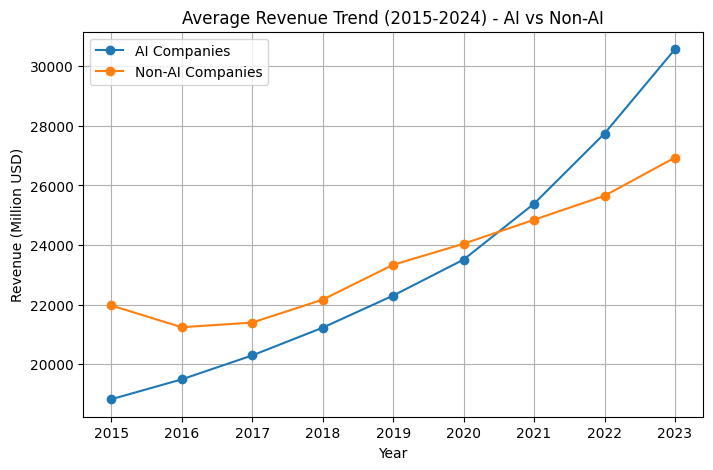

In [5]:
avg_revenue_ai = df_ai[rev_collums].mean()
avg_revenue_non_ai = df_non_ai[rev_collums].mean()

avg_emp_ai = df_ai[emp_collums].mean()
avg_emp_non_ai = df_non_ai[emp_collums].mean()

# Plot Revenue
plt.figure(figsize=(8, 5))
plt.plot(years_list, avg_revenue_ai, marker='o', label='AI Companies')
plt.plot(years_list, avg_revenue_non_ai, marker='o', label='Non-AI Companies')
plt.title("Average Revenue Trend (2015-2024) - AI vs Non-AI")
plt.xlabel("Year")
plt.ylabel("Revenue (Million USD)")
plt.grid(True)
plt.legend()
plt.show()

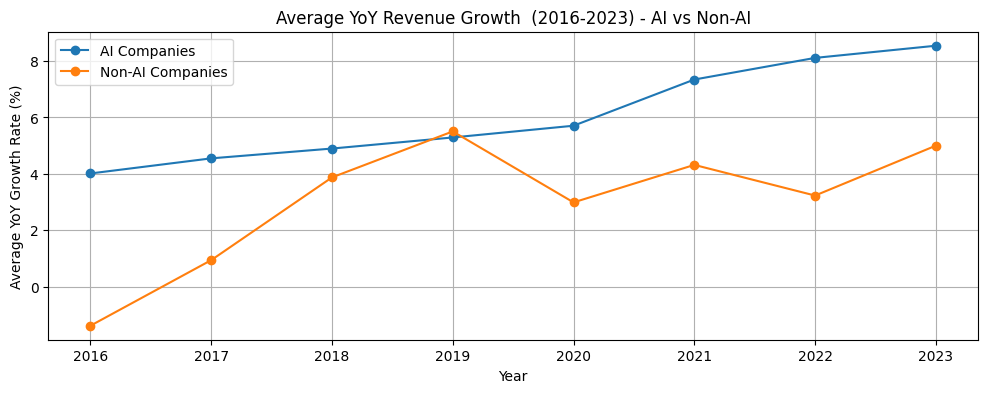

In [6]:
def compute_avg_growth(df_subset, columns):
    growth_list = []
    for idx, row in df_subset.iterrows():
        values = row.loc[columns].astype(float).values  # .loc for column names
        growth = []
        for i in range(len(values)-1):
            if values[i] == 0 or np.isnan(values[i]) or np.isnan(values[i+1]):
                growth.append(np.nan)
            else:
                growth.append((values[i+1] - values[i]) / values[i] * 100)
        growth_list.append(growth)
    # Average across companies (ignoring NaN)
    avg_growth = np.nanmean(np.array(growth_list), axis=0)
    return avg_growth

avg_growth_ai = compute_avg_growth(df_ai, rev_collums)
avg_growth_non_ai = compute_avg_growth(df_non_ai, rev_collums)

# Plot
plt.figure(figsize=(12,4))
plt.plot(growth_years, avg_growth_ai, marker='o', label='AI Companies')
plt.plot(growth_years, avg_growth_non_ai, marker='o', label='Non-AI Companies')
plt.title("Average YoY Revenue Growth  (2016-2023) - AI vs Non-AI")
plt.xlabel("Year")
plt.ylabel("Average YoY Growth Rate (%)")
plt.grid(True)
plt.legend()
plt.show()


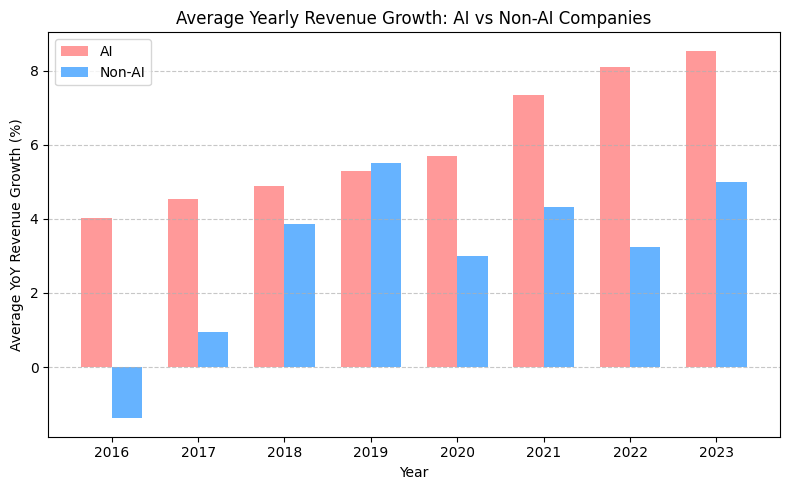

In [7]:
x = np.arange(len(growth_years))   # 8 bars (2016–2023)
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

# Bars for AI & Non-AI companies
ax.bar(x - width/2, avg_growth_ai, width, label='AI', color='#ff9999')
ax.bar(x + width/2, avg_growth_non_ai, width, label='Non-AI', color='#66b3ff')

# Labels & titles
ax.set_xticks(x)
ax.set_xticklabels(growth_years)
ax.set_ylabel("Average YoY Revenue Growth (%)")
ax.set_xlabel("Year")
ax.set_title("Average Yearly Revenue Growth: AI vs Non-AI Companies")

ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

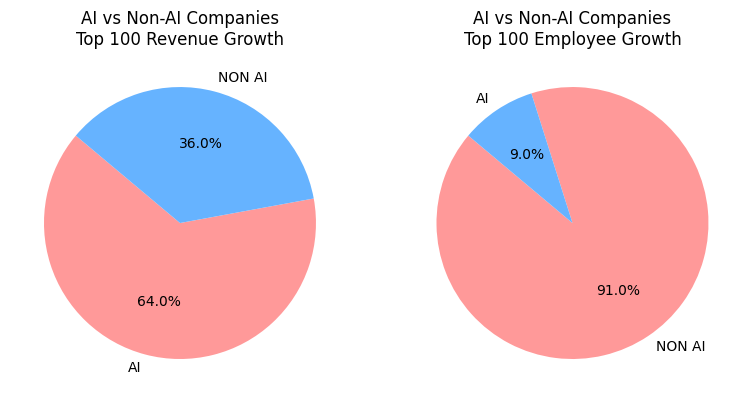

In [8]:
# Compute total revenue growth (%) for each company: (rev_2023 - rev_2015)/rev_2015 * 100
df['total_revenue_growth'] = (df['revenue_mil_y2023'] - df['revenue_mil_y2015']) / df['revenue_mil_y2015'] * 100

# Compute total employee growth (%) for each company
df['total_employee_growth'] = (df['employees_y2023'] - df['employees_y2015']) / df['employees_y2015'] * 100

# Top 100 by revenue growth
top_rev = df.nlargest(100, 'total_revenue_growth')
rev_counts = top_rev['is_ai'].str.lower().value_counts()

# Top 100 by employee growth
top_emp = df.nlargest(100, 'total_employee_growth')
emp_counts = top_emp['is_ai'].str.lower().value_counts()

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Revenue growth pie
axes[0].pie(rev_counts, labels=rev_counts.index.str.upper(), autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
axes[0].set_title("AI vs Non-AI Companies\nTop 100 Revenue Growth")

# Employee growth pie
axes[1].pie(emp_counts, labels=emp_counts.index.str.upper(), autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
axes[1].set_title("AI vs Non-AI Companies\nTop 100 Employee Growth")

plt.tight_layout()
plt.show()

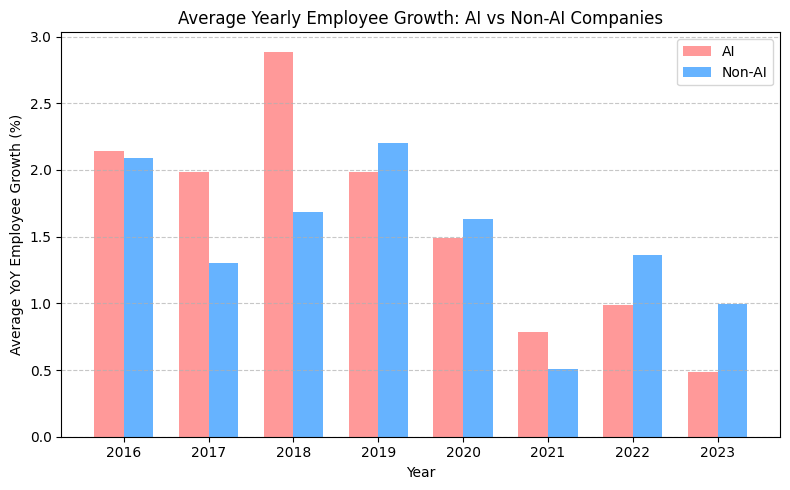

In [9]:
def avg_yoy_growth(df, cols, years):
    growth_dict = {}
    for i in range(1, len(cols)):
        prev = df[cols[i-1]].replace(0, np.nan)
        curr = df[cols[i]]
        growth = ((curr - prev) / prev) * 100
        growth_dict[years[i]] = growth.replace([np.inf, -np.inf], np.nan).mean()
    return growth_dict

growth_ai_emp = avg_yoy_growth(df_ai, emp_collums, years_list)
growth_non_ai_emp = avg_yoy_growth(df_non_ai, emp_collums, years_list)

x = np.arange(len(growth_ai_emp))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))

ax.bar(x - width/2, growth_ai_emp.values(), width, label='AI', color='#ff9999')
ax.bar(x + width/2, growth_non_ai_emp.values(), width, label='Non-AI', color='#66b3ff')

ax.set_xticks(x)
ax.set_xticklabels(list(growth_ai_emp.keys()))
ax.set_ylabel("Average YoY Employee Growth (%)")
ax.set_xlabel("Year")
ax.set_title("Average Yearly Employee Growth: AI vs Non-AI Companies")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


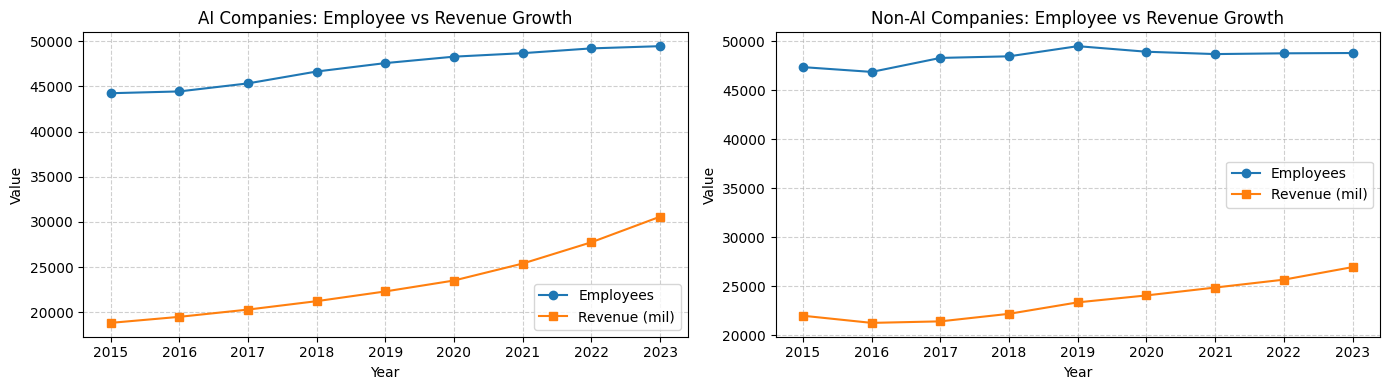

In [10]:
# Subplots 
fig, axes = plt.subplots(1, 2, figsize=(14,4))

# Reusing previous data
axes[0].plot(years_list, avg_emp_ai, marker='o', label="Employees")
axes[0].plot(years_list, avg_revenue_ai, marker='s', label="Revenue (mil)")
axes[0].set_title("AI Companies: Employee vs Revenue Growth")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Value")
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)

axes[1].plot(years_list, avg_emp_non_ai, marker='o', label="Employees")
axes[1].plot(years_list, avg_revenue_non_ai, marker='s', label="Revenue (mil)")
axes[1].set_title("Non-AI Companies: Employee vs Revenue Growth")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Value")
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

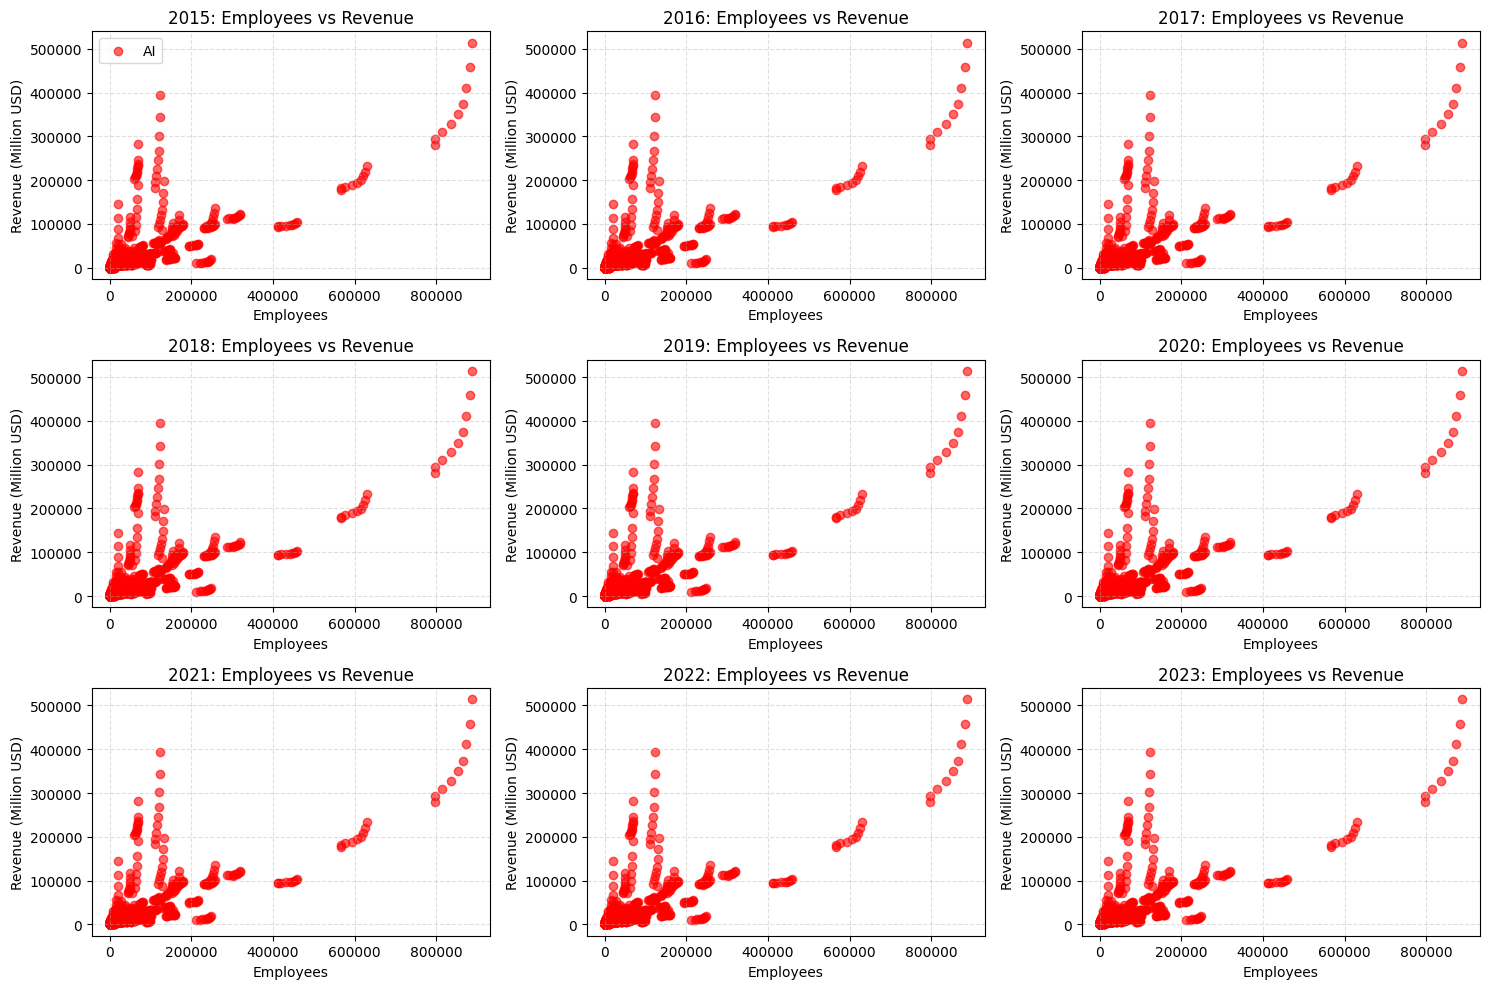

In [11]:
# 6 subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, year in enumerate(years_list):
    ax = axes[i]
    
    emp_col = f"emp_y{year}"
    rev_col = f"revenue_mil_y{year}"

    # scatter AI
    ax.scatter(
        df_ai[emp_collums],
        df_ai[rev_collums],
        color='red',
        alpha=0.6,
        label='AI' if i == 0 else ""
    )

    # scatter Non-AI
    # ax.scatter(
    #     df_non_ai[emp_collums],
    #     df_non_ai[rev_collums],
    #     color='blue',
    #     alpha=0.6,
    #     label='Non-AI' if i == 0 else ""
    # )

    ax.set_title(f"{year}: Employees vs Revenue")
    ax.set_xlabel("Employees")
    ax.set_ylabel("Revenue (Million USD)")
    ax.grid(True, linestyle='--', alpha=0.4)

# only show legend once
axes[0].legend()

plt.tight_layout()
plt.show()

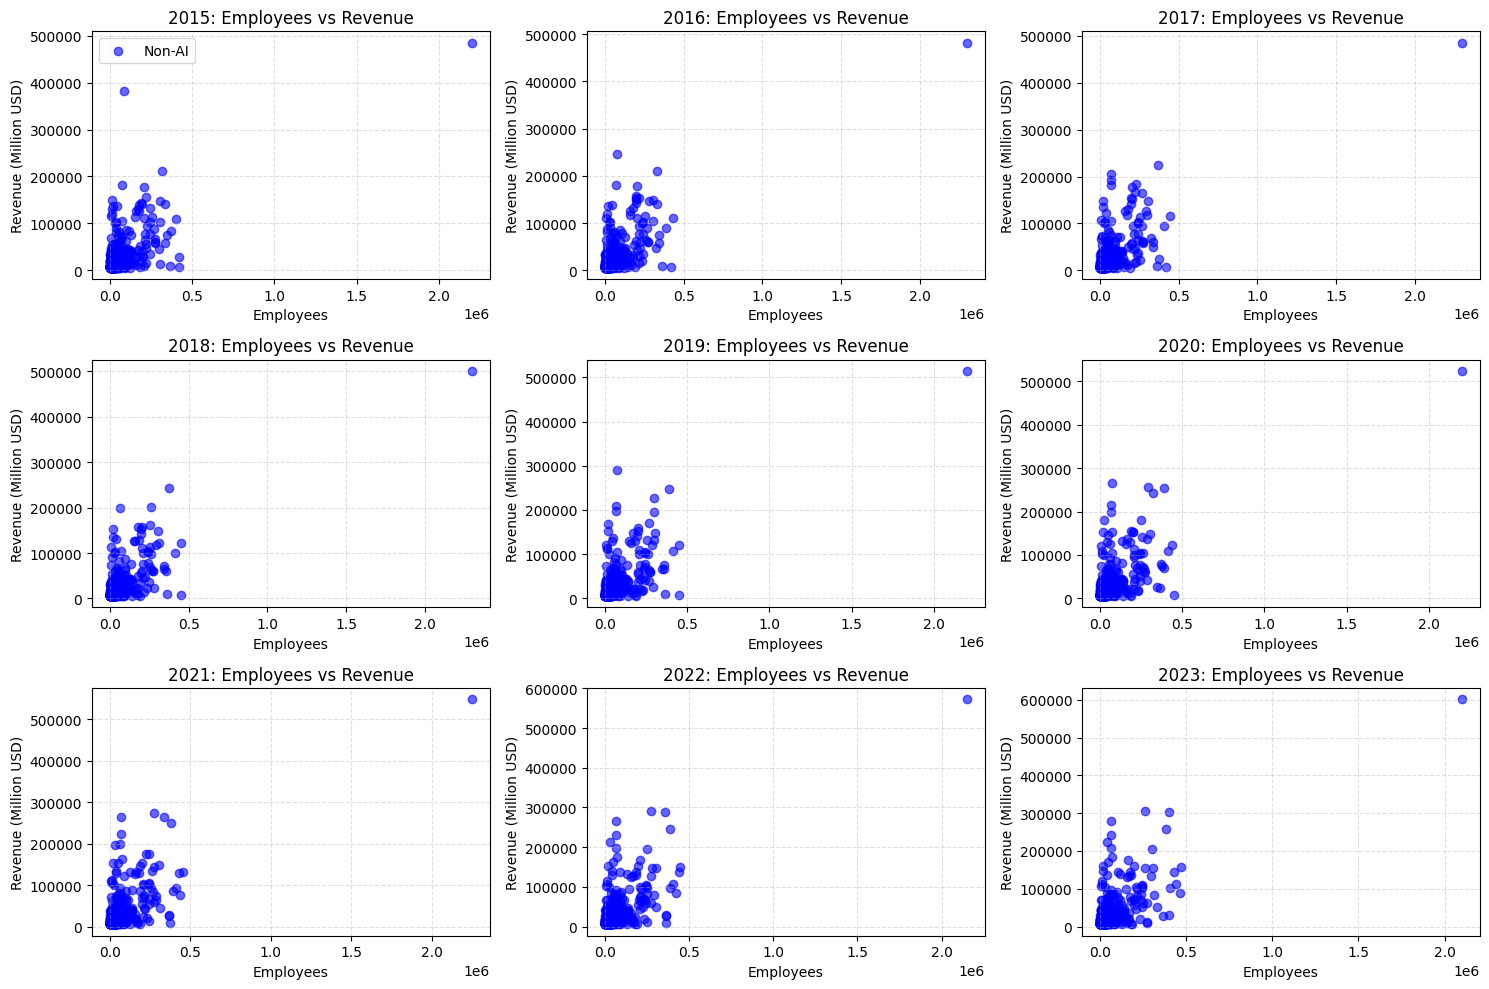

In [13]:
# 6 subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, year in enumerate(years_list):
    ax = axes[i]
    
    emp_col = f"employees_y{year}"
    rev_col = f"revenue_mil_y{year}"

    # scatter Non-AI
    ax.scatter(
        df_non_ai[emp_col],
        df_non_ai[rev_col],
        color='blue',
        alpha=0.6,
        label='Non-AI' if i == 0 else ""
    )

    ax.set_title(f"{year}: Employees vs Revenue")
    ax.set_xlabel("Employees")
    ax.set_ylabel("Revenue (Million USD)")
    ax.grid(True, linestyle='--', alpha=0.4)

# only show legend once
axes[0].legend()

plt.tight_layout()
plt.show()

Ai companies


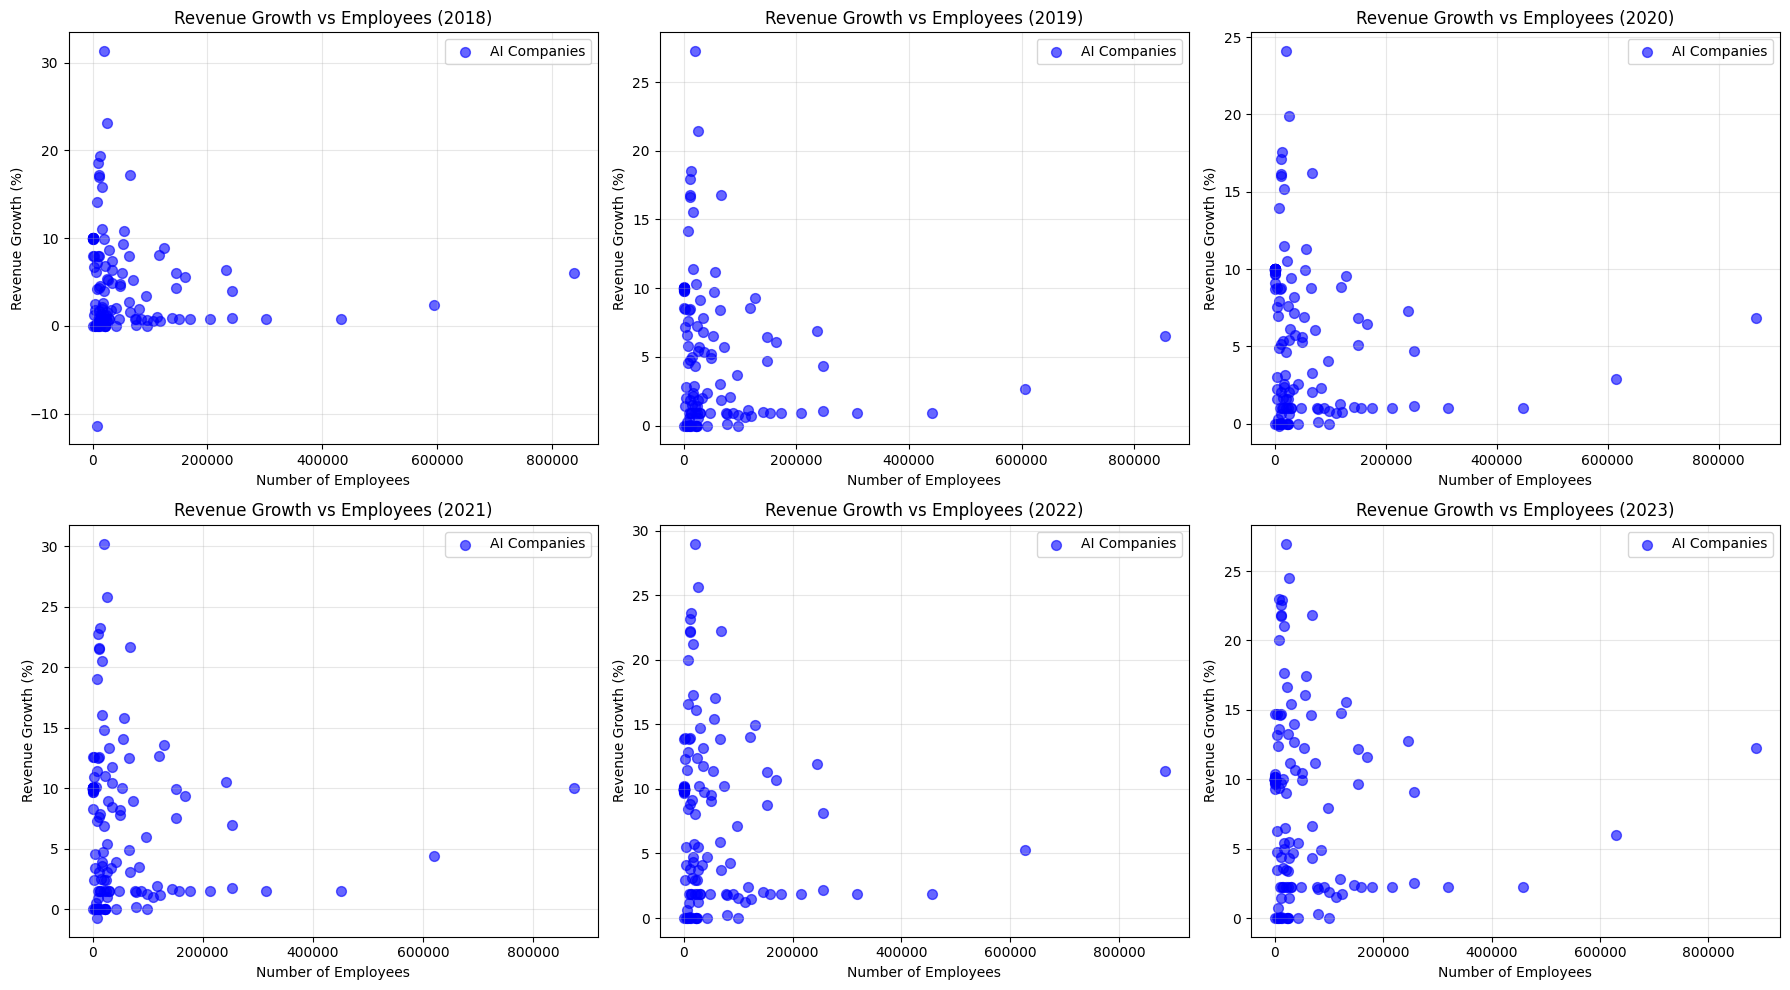

In [14]:
def compute_company_growth(df, cols):
    growth_df = []
    for idx, row in df.iterrows():
        values = row[cols].astype(float).values
        growth = []
        for i in range(len(values)-1):
            if values[i] == 0 or np.isnan(values[i]) or np.isnan(values[i+1]):
                growth.append(np.nan)
            else:
                growth.append((values[i+1] - values[i]) / values[i] * 100)
        growth_df.append(growth)
        # print(growth, idx)
    return np.array(growth_df)

growth_ai_full = compute_company_growth(df_ai, rev_collums)

# Create scatter plots for the last 6 years
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Get the last 6 years (2019-2024)
last_6_years = years_list[-6:]

for i, year in enumerate(last_6_years):
    year_idx = years_list.index(year)
    growth_year_idx = year_idx - 1  # Growth from previous year
    
    # # AI companies: Revenue Growth vs Number of Employees
    axes[i].scatter(df_ai[emp_collums[year_idx]].values,  # X: Number of Employees
                   growth_ai_full[:, growth_year_idx],   # Y: Revenue Growth %
                   alpha=0.6, label='AI Companies', color='blue', s=50)
    
    # Non-AI companies: Revenue Growth vs Number of Employees  
    # axes[i].scatter(df_non_ai[emp_collums[year_idx]].values,  # X: Number of Employees
    #                growth_non_ai_full[:, growth_year_idx],   # Y: Revenue Growth %
    #                alpha=0.6, label='Non-AI Companies', color='red', s=50)
    
    axes[i].set_xlabel('Number of Employees')
    axes[i].set_ylabel('Revenue Growth (%)')
    axes[i].set_title(f'Revenue Growth vs Employees ({year})')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)
print("Ai companies")
plt.tight_layout()
plt.show()


Non AI companies (2018-2023)


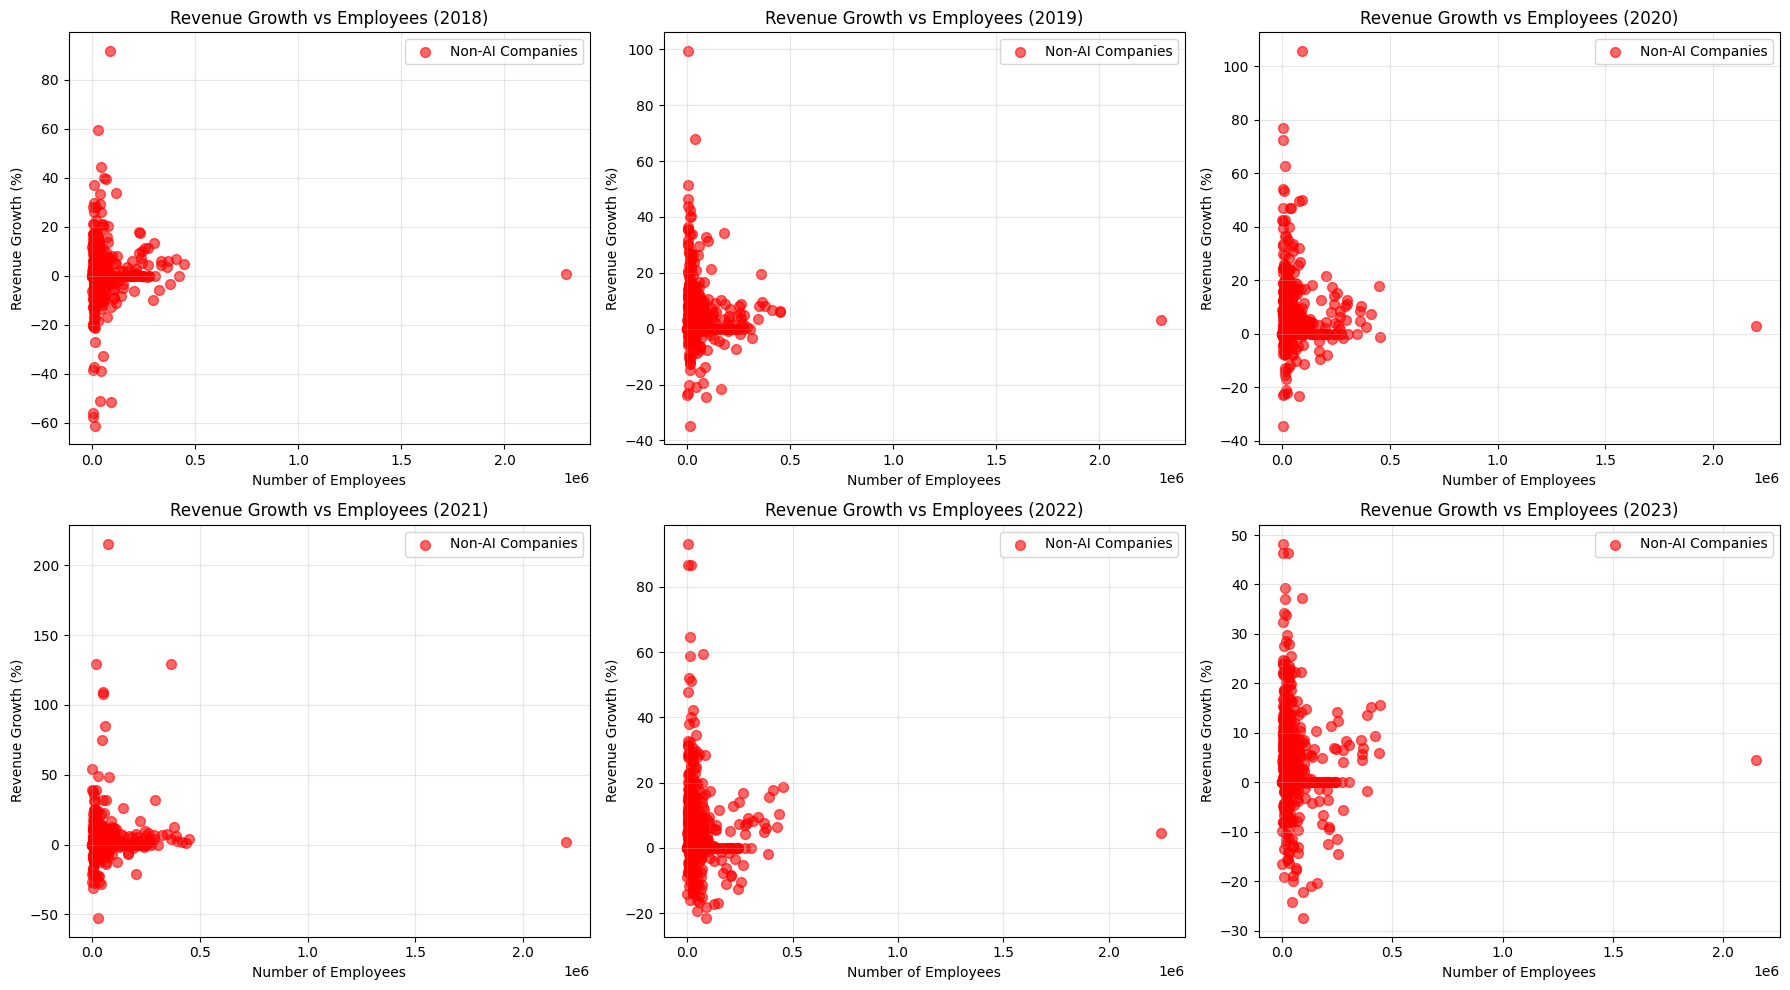

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Get years from 2017 to 2022
selected_years = [str(y) for y in range(2017, 2023)]
growth_non_ai_full = compute_company_growth(df_non_ai, rev_collums)


for i, year in enumerate(selected_years):
    year_idx = years_list.index(year)
    growth_year_idx = year_idx - 1  # Growth from previous year
        
    # Non-AI companies: Revenue Growth vs Number of Employees  
    axes[i].scatter(df_non_ai[emp_collums[year_idx]].values,  # X: Number of Employees
                   growth_non_ai_full[:, growth_year_idx],   # Y: Revenue Growth %
                   alpha=0.6, label='Non-AI Companies', color='red', s=50)
    
    axes[i].set_xlabel('Number of Employees')
    axes[i].set_ylabel('Revenue Growth (%)')
    axes[i].set_title(f'Revenue Growth vs Employees ({2018+i})')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

print("Non AI companies (2018-2023)")
plt.tight_layout()
plt.show()

/tmp/ipykernel_120767/2407095233.py:37: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dev_ai_flat, shade=True, color='#ff9999', label='AI Companies')


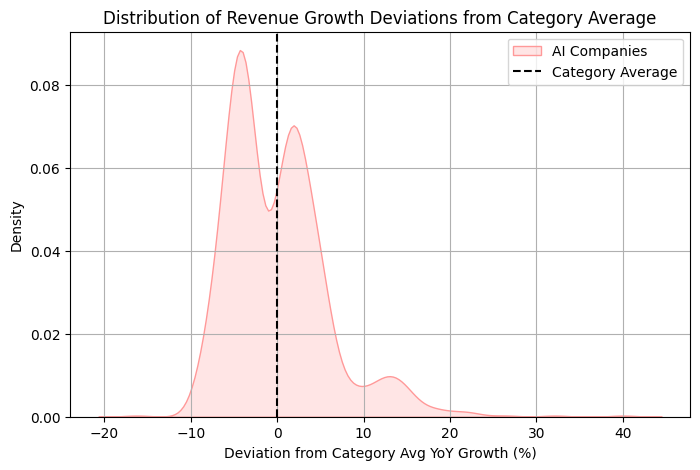

In [17]:
# Function to compute YoY growth matrix
def compute_yoy_growth_matrix(df_subset, columns):
    growth_matrix = []
    for idx, row in df_subset.iterrows():
        values = row.loc[columns].astype(float).values
        growth = []
        for i in range(len(values)-1):
            if values[i] == 0 or np.isnan(values[i]) or np.isnan(values[i+1]):
                growth.append(np.nan)
            else:
                growth.append((values[i+1] - values[i]) / values[i] * 100)
        growth_matrix.append(growth)
    return np.array(growth_matrix)

# Compute growth matrices
growth_ai_matrix = compute_yoy_growth_matrix(df_ai, rev_collums)
growth_non_ai_matrix = compute_yoy_growth_matrix(df_non_ai, rev_collums)

# Compute average growth per category
avg_growth_ai = np.nanmean(growth_ai_matrix, axis=0)
avg_growth_non_ai = np.nanmean(growth_non_ai_matrix, axis=0)

# Compute deviations from category average
dev_ai = growth_ai_matrix - avg_growth_ai
dev_non_ai = growth_non_ai_matrix - avg_growth_non_ai

# Flatten for plotting
dev_ai_flat = dev_ai.flatten()
dev_non_ai_flat = dev_non_ai.flatten()

# Remove NaN values
dev_ai_flat = dev_ai_flat[~np.isnan(dev_ai_flat)]
dev_non_ai_flat = dev_non_ai_flat[~np.isnan(dev_non_ai_flat)]

# Plot distribution
plt.figure(figsize=(8,5))
sns.kdeplot(dev_ai_flat, shade=True, color='#ff9999', label='AI Companies')
plt.axvline(0, color='black', linestyle='--', label='Category Average')
plt.title("Distribution of Revenue Growth Deviations from Category Average")
plt.xlabel("Deviation from Category Avg YoY Growth (%)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_120767/418454210.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dev_non_ai_flat, shade=True, color='#66b3ff', label='Non-AI Companies')


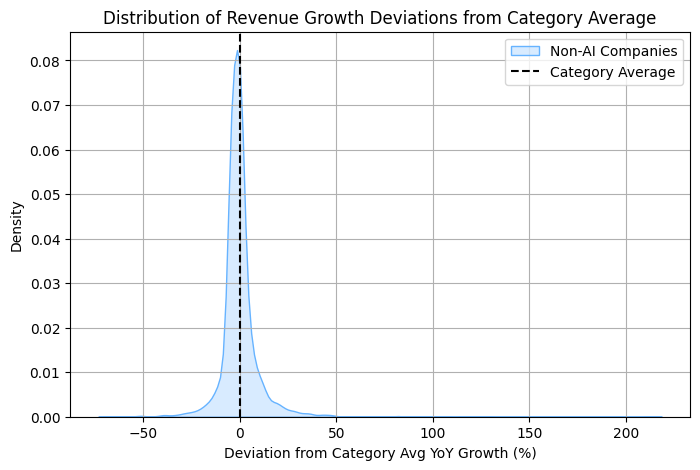

In [18]:
# Plot distribution
plt.figure(figsize=(8,5))
sns.kdeplot(dev_non_ai_flat, shade=True, color='#66b3ff', label='Non-AI Companies')
plt.axvline(0, color='black', linestyle='--', label='Category Average')
plt.title("Distribution of Revenue Growth Deviations from Category Average")
plt.xlabel("Deviation from Category Avg YoY Growth (%)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_120767/3434997626.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Deviation (%)', data=df_box, palette=['#ff9999','#66b3ff'])


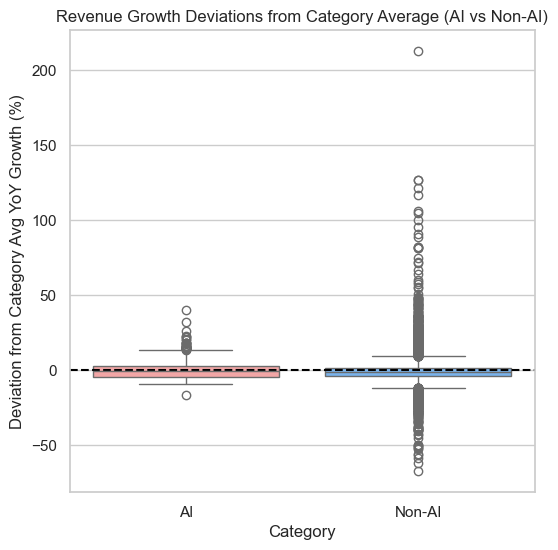

In [19]:
sns.set(style="whitegrid")

# boxplot
df_box = pd.DataFrame({
    'Deviation (%)': np.concatenate([dev_ai_flat, dev_non_ai_flat]),
    'Category': ['AI']*len(dev_ai_flat) + ['Non-AI']*len(dev_non_ai_flat)
})

# Plot
plt.figure(figsize=(6,6))
sns.boxplot(x='Category', y='Deviation (%)', data=df_box, palette=['#ff9999','#66b3ff'])
plt.title("Revenue Growth Deviations from Category Average (AI vs Non-AI)")
plt.axhline(0, color='black', linestyle='--')
plt.ylabel("Deviation from Category Avg YoY Growth (%)")
plt.show()